# Vision

3D camera calibration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#%matplotlib widget

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

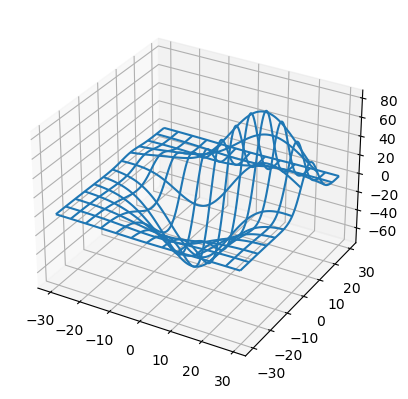

In [4]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()


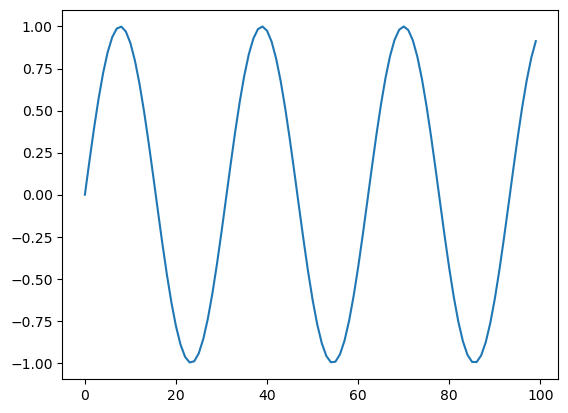

In [5]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)));
plt.show()


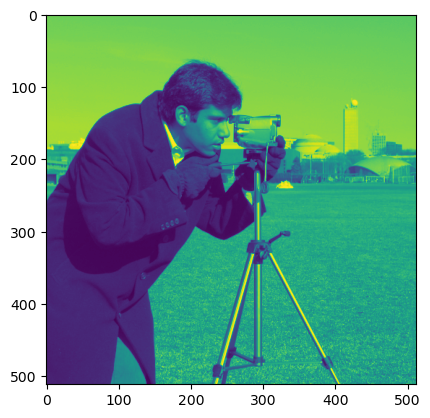

In [6]:
from skimage.data import camera,astronaut

fig = plt.figure()
g = camera() 
plt.imshow(g);
plt.show()

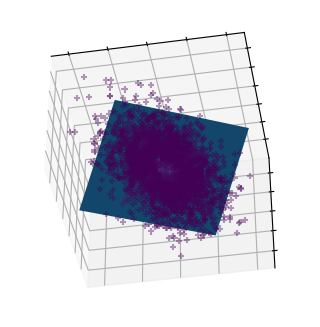

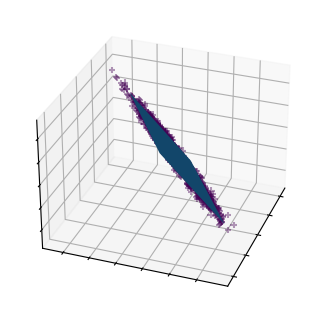

In [7]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    return fig
    

elev = -40
azim = -80
fig1 = plot_figs(10, elev, azim)

elev = 30
azim = 20
fig2 = plot_figs(11, elev, azim)


plt.show()


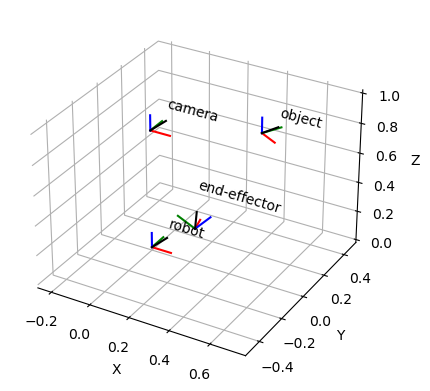

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d import rotations as pr
from pytransform3d import transformations as pt
from pytransform3d.transform_manager import TransformManager


random_state = np.random.RandomState(0)

ee2robot = pt.transform_from_pq(
    np.hstack((np.array([0.4, -0.3, 0.5]),
               pr.random_quaternion(random_state))))
cam2robot = pt.transform_from_pq(
    np.hstack((np.array([0.0, 0.0, 0.8]), pr.q_id)))
object2cam = pt.transform_from(
    pr.active_matrix_from_intrinsic_euler_xyz(np.array([0.0, 0.0, -0.5])),
    np.array([0.5, 0.1, 0.1]))

plt.figure()

tm = TransformManager()
tm.add_transform("end-effector", "robot", ee2robot)
tm.add_transform("camera", "robot", cam2robot)
tm.add_transform("object", "camera", object2cam)

ee2object = tm.get_transform("end-effector", "object")

ax = tm.plot_frames_in("robot", s=0.1)
ax.set_xlim((-0.25, 0.75))
ax.set_ylim((-0.5, 0.5))
ax.set_zlim((0.0, 1.0))
plt.show()

In [9]:
import cv2

In [10]:
orb=cv2.ORB_create(nfeatures=20,nlevels=4,scaleFactor=2.5,patchSize=31,
                   fastThreshold=20)

def draw_keypoints(vis, keypoints, color = (255, 0, 0)):
    for kp in keypoints:
            x, y = kp.pt
            cv2.circle(vis, (int(x), int(y)), 5, color)


In [11]:
g = camera()
kp = orb.detect(g,None)
kp, des = orb.compute(g, kp)
#img=draw_keypoints(g,kp)

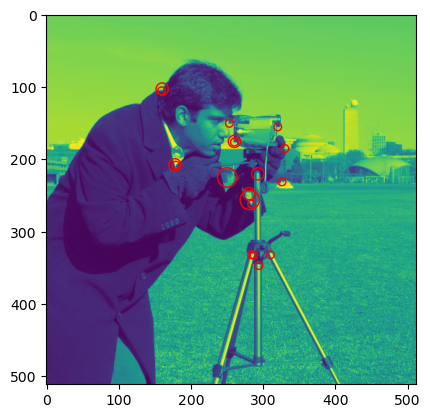

In [12]:
plt.figure()
plt.imshow(g)
x = [p.pt[0] for p in kp]
y = [p.pt[1] for p in kp]
s = [p.size for p in kp]
plt.scatter(x,y,s=s,ec='r',fc='none')
plt.show()

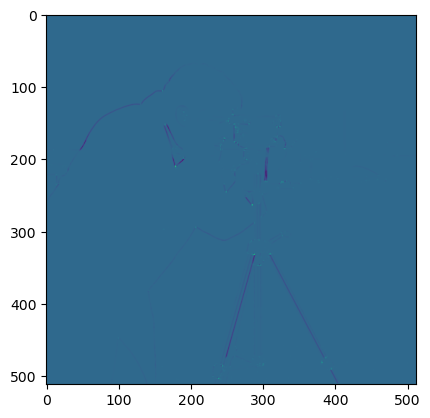

In [13]:
g = camera()

# Detector parameters
thresh = 1
blockSize = 2
apertureSize = 3
k = 0.04

# Detecting corners
dst = cv2.cornerHarris(g, blockSize, apertureSize, k)

# Normalizing
#dst_norm = np.empty(dst.shape, dtype=np.float32)
#cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
#dst_norm_scaled = cv.convertScaleAbs(dst_norm)

plt.figure()
plt.imshow(dst)
plt.show()

# Harris corner detection

see https://docs.opencv.org
Let's look for corners. Since corners represents a variation in the gradient in the image, we will look for this "variation".

Consider a grayscale image I. We are going to sweep a window $w(x,y)$ (with displacements u in the x direction and v in the y direction) I and will calculate the variation of intensity.

\begin{equation} 
E(u,v) = \sum _{x,y} w(x,y)[ I(x+u,y+v) - I(x,y)]^{2}
\end{equation} 


where:

$w(x,y)$ is the window at position $(x,y)$

$I(x,y)$ is the intensity at $(x,y)$

$I(x+u,y+v)$ is the intensity at the moved window $(x+u,y+v)$
    
Since we are looking for windows with corners, we are looking for windows with a large variation in intensity. Hence, we have to maximize the equation above, specifically the term:

$\sum _{x,y}[ I(x+u,y+v) - I(x,y)]^{2}$

Using Taylor expansion:
\begin{equation} 
E(u,v) \approx \sum _{x,y}[ I(x,y) + u I_{x} + vI_{y} - I(x,y)]^{2}
\end{equation} 

Expanding the equation and cancelling properly:

\begin{equation} 
E(u,v) \approx \sum _{x,y} u^{2}I_{x}^{2} + 2uvI_{x}I_{y} + v^{2}I_{y}^{2}
\end{equation} 

Which can be expressed in a matrix form as:

\begin{equation}
E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} \left ( \displaystyle \sum_{x,y} w(x,y) \begin{bmatrix} I_x^{2} & I_{x}I_{y} \\ I_xI_{y} & I_{y}^{2} \end{bmatrix} \right ) \begin{bmatrix} u \\ v \end{bmatrix}
\end{equation}

Let's denote:
\begin{equation}
M = \displaystyle \sum_{x,y} w(x,y) \begin{bmatrix} I_x^{2} & I_{x}I_{y} \\ I_xI_{y} & I_{y}^{2} \end{bmatrix}
\end{equation}

So, our equation now is:

\begin{equation}
E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}
\end{equation}

A score is calculated for each window, to determine if it can possibly contain a corner:

\begin{equation}
R = det(M) - k(trace(M))^{2}
\label{eq:vector_ray}
\end{equation}

where:

$det(M) = \lambda_{1}\lambda_{2}$

$trace(M) = \lambda_{1}+\lambda_{2}$

Harris suggested to use $\eqref{eq:vector_ray}$ to speed up the corner detection instead of explicitely compute $\lambda_{1,2}$


# Image derivative

Image derivative can be approximated by discrete differentiation operators

\begin{equation}
f'(x) = \lim_{h\to0} \frac{f(x+h) - f(x)}{h}
\end{equation}

for images, the equivallent is given by the convolution ($*$) of the image $\mathbf{A}$  by the Prewitt operator,

\begin{equation}
\mathbf{G_x} = \begin{bmatrix} 
+1 & 0 & -1 \\
+1 & 0 & -1 \\
+1 & 0 & -1
\end{bmatrix} * \mathbf{A}
\end{equation}

\begin{equation}
\mbox{and} \quad \quad \mathbf{G_y} = \begin{bmatrix} 
+1 & +1 & +1 \\
0 & 0 & 0 \\
-1 & -1 & -1
\end{bmatrix} * \mathbf{A}
\end{equation}


see https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

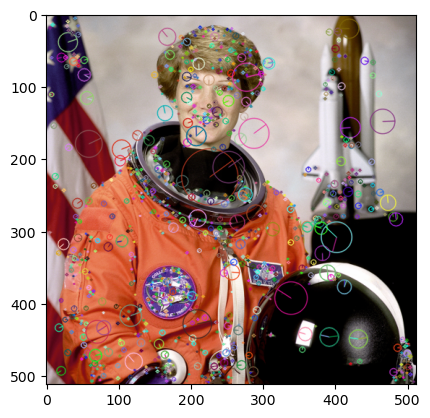

In [14]:
g = astronaut()
sift = cv2.SIFT_create()
kp = sift.detect(g,None)
img=cv2.drawKeypoints(g,kp,g,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imsave('astro_points.png',img)
plt.figure()
plt.imshow(img)
plt.show()

In [15]:
%%HTML 
<script>
    function luc21893_refresh_cell(cell) {
        if( cell.luc21893 ) return;
        cell.luc21893 = true;
        console.debug('New code cell found...' );
        
        var div = document.createElement('DIV');            
        cell.parentNode.insertBefore( div, cell.nextSibling );
        div.style.textAlign = 'right';
        var a = document.createElement('A');
        div.appendChild(a);
        a.href='#'
        a.luc21893 = cell;
        a.setAttribute( 'onclick', "luc21893_toggle(this); return false;" );

        cell.style.visibility='hidden';
        cell.style.position='absolute';
        a.innerHTML = '[show code]';        
                
    }
    function luc21893_refresh() {                
        if( document.querySelector('.code_cell .input') == null ) {            
            // it apeears that I am in a exported html
            // hide this code
            var codeCells = document.querySelectorAll('.jp-InputArea')
            codeCells[0].style.visibility = 'hidden';
            codeCells[0].style.position = 'absolute';                        
            for( var i = 1; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i].parentNode)
            }
            window.onload = luc21893_refresh;
        }                 
        else {
            // it apperas that I am in a jupyter editor
            var codeCells = document.querySelectorAll('.code_cell .input')
            for( var i = 0; i < codeCells.length; i++ ) {
                luc21893_refresh_cell(codeCells[i])
            }            
            window.setTimeout( luc21893_refresh, 1000 )
        }        
    }
    
    function luc21893_toggle(a) {
        if( a.luc21893.style.visibility=='hidden' ) {
            a.luc21893.style.visibility='visible';        
            a.luc21893.style.position='';
            a.innerHTML = '[hide code]';
        }
        else {
            a.luc21893.style.visibility='hidden';        
            a.luc21893.style.position='absolute';
            a.innerHTML = '[show code]';
        }
    }
    
    luc21893_refresh()
</script>